Pan Card Detection

In [ ]:
!pip install imutils

In [44]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
import numpy as np

In [5]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering\image

In [40]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [30]:
type(original),tampered.size

(PIL.JpegImagePlugin.JpegImageFile, (282, 179))

In [31]:
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)

(250, 160)
(250, 160)


In [32]:
# Change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png')#can do png to jpg

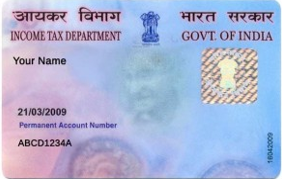

In [33]:
tampered

In [34]:
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [46]:
o_np = np.array(original)
t_np = np.array(tampered)

In [47]:
new_o = cv2.resize(o_np,(250, 160))
new_t = cv2.resize(t_np,(250, 160))

In [41]:
original.size,tampered.size

((1200, 800), (282, 179))

In [48]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(new_o, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(new_t, cv2.COLOR_BGR2GRAY)

In [49]:
tampered_gray.size,original_gray.size

(40000, 40000)

In [50]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM Score is : {}".format(score*100))
if score >= 80:
    print ("The given pan card is original")
else:
    print("The given pan card is tampered")

SSIM Score is : 24.26961047972457
The given pan card is tampered


In [61]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering\image

import numpy as np
from skimage.metrics import structural_similarity
import cv2
def ssim_tampering(original,tampered):
    o_np = np.array(original)
    t_np = np.array(tampered)
    new_o = cv2.resize(o_np,(250, 160))
    new_t = cv2.resize(t_np,(250, 160))
    # if (original.size == tampered.size):
    
    # Convert the images to grayscale
    original_gray = cv2.cvtColor(new_o, cv2.COLOR_BGR2GRAY)
    tampered_gray = cv2.cvtColor(new_t, cv2.COLOR_BGR2GRAY)
    (score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM Score is : {}".format(score*100))
    if score >= 80:
        return "The given pan card is original"
    else:
        return "The given pan card is tampered"


A subdirectory or file pan_card_tampering already exists.
A subdirectory or file pan_card_tampering\image already exists.


In [62]:
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')
ssim_tampering(original=original,tampered=tampered)

SSIM Score is : 32.205125755461204


'The given pan card is tampered'